# Práctica 1

## 1. Conjunto de Cantor

### Ejercicios previos

#### Dibuja un segmento de longitud 1.

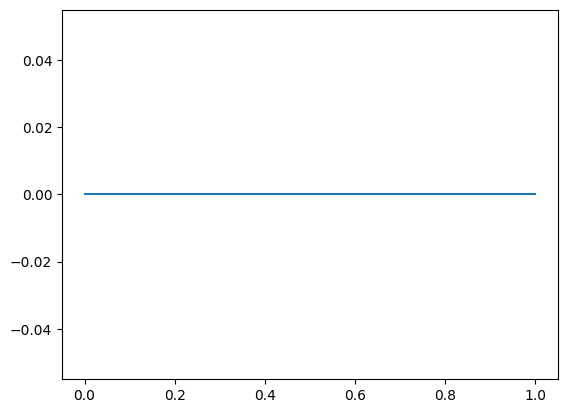

In [72]:
import matplotlib.pyplot as plt

x = [0, 1]
y = [0, 0]

plt.figure()
plt.plot(x, y)

#### Dibuja dos segmentos: [0,1/3] y [2/3,1]. 

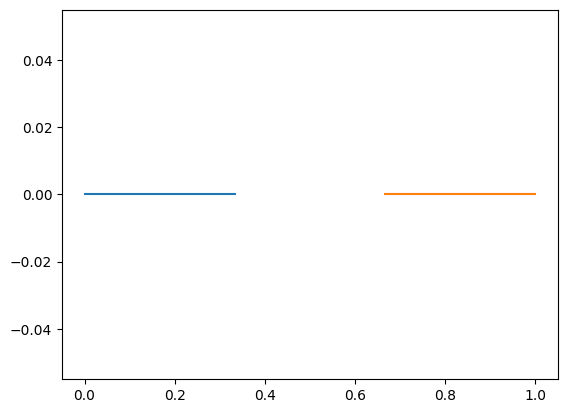

In [73]:
x1 = [0, 1/3]
y1 = [0, 0]

x2 = [2/3, 1]
y2 = [0, 0]

plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)

#### Dibuja una secuencia de 10 intervalos en [0,1] separados regularmente

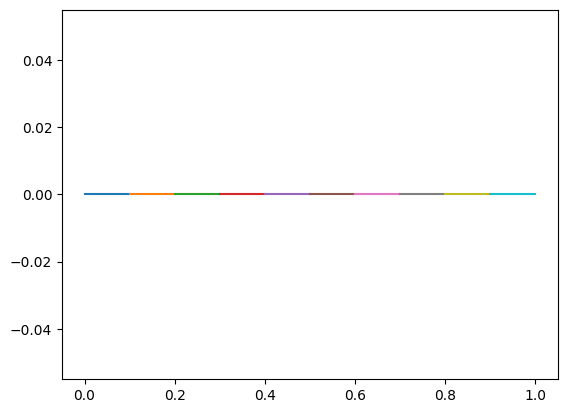

In [74]:
import numpy as np

# Puntos de división
x_points = np.linspace(0, 1, 10 + 1)

plt.figure()

# Dibujar cada intervalo
for i in range(10):
    x_segment = [x_points[i], x_points[i+1]]
    y_segment = [0, 0]
    plt.plot(x_segment, y_segment)

### Procedimientos para las funciones:

#### Hacer un procedimiento que tenga como entrada (n,p), donde n puede tomar los valores 1 ó 2, según se aplique la función f_1 o f_2 en la construcción del conjunto de Cantor de razón 1/3. El parámetro p es un vector de puntos a los que se aplica la función correspondiente. 

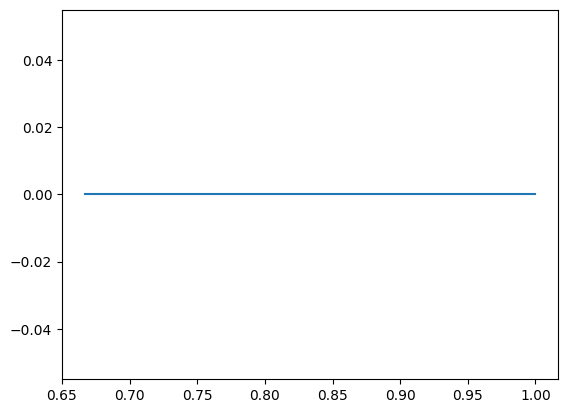

In [75]:
def f1(n, p):
    if n == 1:
        return [[coord / 3 for coord in point] for point in p]
    elif n == 2:
        return [[2/3 + point[0] / 3, point[1] / 3] for point in p]

puntos = [[0, 0], [1, 0]]
resultados = f1(2, puntos)
x_vals = [pt[0] for pt in resultados]
y_vals = [pt[1] for pt in resultados]

plt.plot(x_vals, y_vals)

### Paso n-ésimo. Hacer un procedimiento para dibujar el paso n-ésimo del conjunto de cantor

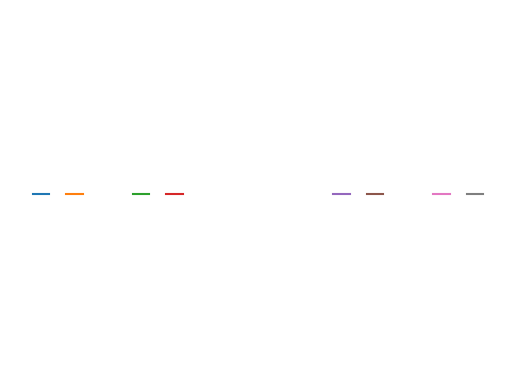

In [76]:
def cantorn(n):
    segments = [[[0, 0], [1, 0]]]
    for i in range(n):
        new_segments = []
        for j in [1, 2]:
            for seg in segments:
                new_segments.append(f1(j, seg))
        segments = new_segments
    plt.figure()
    for seg in segments:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])
    plt.axis('off')
    plt.show()

# Ejemplo:
cantorn(3)


## 2. Conjunto de Cantor generalizado

### Hacer un procedimiento que tenga como entrada (n,r), donde r es la razón de las semejanzas y n es la iteración. 

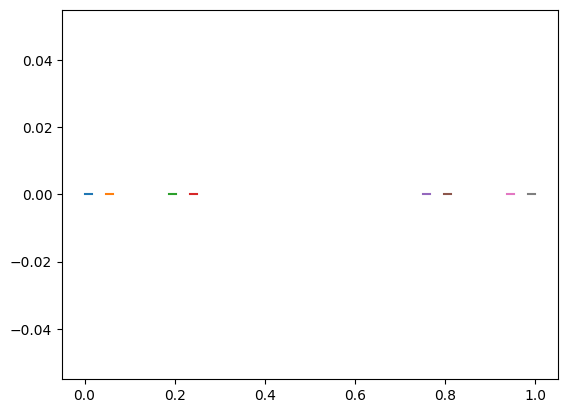

In [77]:
def razon(n, r, seg):
    if n == 1:
        return [[coord / r for coord in punto] for punto in seg]
    elif n == 2:
        return [[(punto[0] / r) + (1 - 1/r), punto[1] / r] for punto in seg]

def cantor(n, r):
    segmentos = [[[0, 0], [1, 0]]]
    for i in range(n):
        nuevos = []
        for j in [1, 2]:
            for seg in segmentos:
                nuevos.append(razon(j, r, seg))
        segmentos = nuevos
    plt.figure()
    for seg in segmentos:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])

cantor(3, 4)


### Hacer un conjunto tipo Cantor con más de dos semejanzas. 

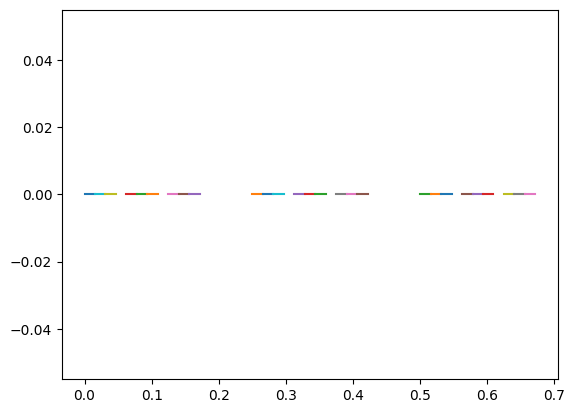

In [78]:
def func_semejanzas(segmento, escala, traslacion):
    return [
        [escala * segmento[0][0] + traslacion, escala * segmento[0][1]],
        [escala * segmento[1][0] + traslacion, escala * segmento[1][1]]
    ]

def cantor_general(n, semejanzas):
    segmentos = [[[0, 0], [1, 0]]] 

    for _ in range(n):
        nuevos_segmentos = []
        for seg in segmentos:
            for esc, tras in semejanzas:
                nuevos_segmentos.append(func_semejanzas(seg, esc, tras))
        segmentos = nuevos_segmentos
    plt.figure()
    for seg in segmentos:
        plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])

lista_semejanzas = [(1/4, 0), (1/4, 1/4), (1/4, 1/2)]
cantor_general(3, lista_semejanzas)


### Hacer un conjunto tipo Cantor con dos semejanzas de razones diferentes. 

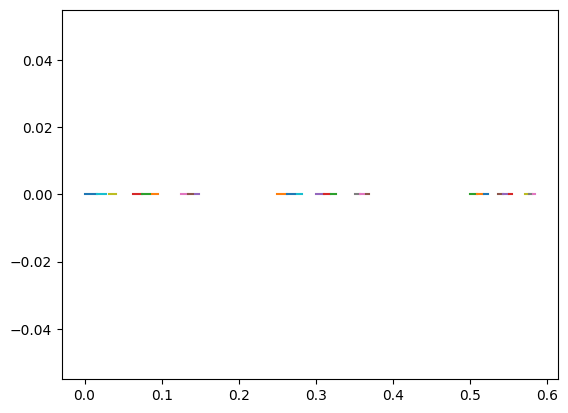

In [79]:
lista_semejanzas = [(1/4, 0), (1/5, 1/4), (1/7, 1/2)]
cantor_general(3, lista_semejanzas)

## 3. Sierpinski

### Escribe un programa que dibuje el triángulo de Sierpinski de razón 1/2 sobre el triángulo equilátero unidad.

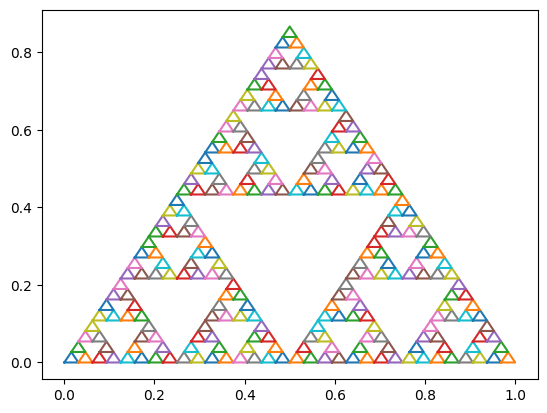

In [80]:
import math

def ftriangulo(n, p):
    if n == 1:
        t = (0, 0)
    elif n == 2:
        t = (1/2, 0)
    elif n == 3:
        t = (1/4, (1/4) * math.sqrt(3))
    l1 = []
    for punto in p:
        nuevo_punto = [1/2 * punto[0] + t[0],
                        1/2 * punto[1] + t[1]]
        l1.append(nuevo_punto)
    return l1

def sierpinski(n):
    triangulo_inicial = [[0, 0],
                         [0.5, 0.5 * math.sqrt(3)],
                         [1, 0]]
    poligonos = [triangulo_inicial]
    for _ in range(n):
        nuevos_poligonos = []
        for j in [1, 2, 3]:
            for pol in poligonos:
                nuevos_poligonos.append(ftriangulo(j, pol))
        poligonos = nuevos_poligonos

    plt.figure()
    for pol in poligonos:
        x = [p[0] for p in pol] + [pol[0][0]]
        y = [p[1] for p in pol] + [pol[0][1]]
        plt.plot(x, y)

sierpinski(5)

## 4. Implementar el juego del caos

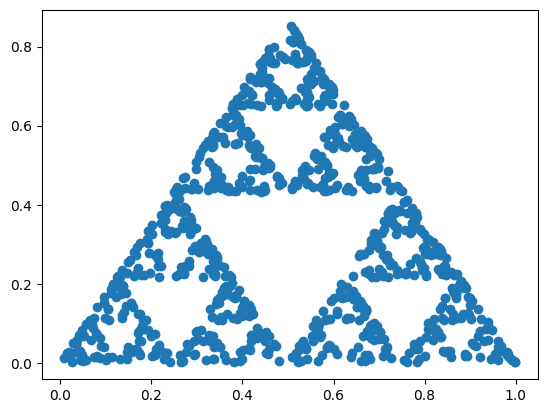

In [81]:
import random
def medio(p):
    dado3 = random.randint(1, 3)
    if dado3 == 1:
        return [0.5 * p[0], 0.5 * p[1]]
    elif dado3 == 2:
        return [0.5 * p[0] + 0.5, 0.5 * p[1]]
    elif dado3 == 3:
        return [0.5 * p[0] + 0.25, 0.5 * p[1] + 0.25 * math.sqrt(3)]

def juego_caos(n):
    puntos = []
    m = [0, 0]
    for i in range(n):
        m = medio(m)
        puntos.append(m)
    x_vals = [pt[0] for pt in puntos]
    y_vals = [pt[1] for pt in puntos]
    
    plt.figure()
    plt.scatter(x_vals, y_vals)

juego_caos(1000)


## 5. Sierpinski aleatorio

### Escribe un programa que dibuje un triángulo de Sierpinski aleatorio en el que se eligen aleatoriamente los puntos de cada lado que determinan los triángulos del paso siguiente.

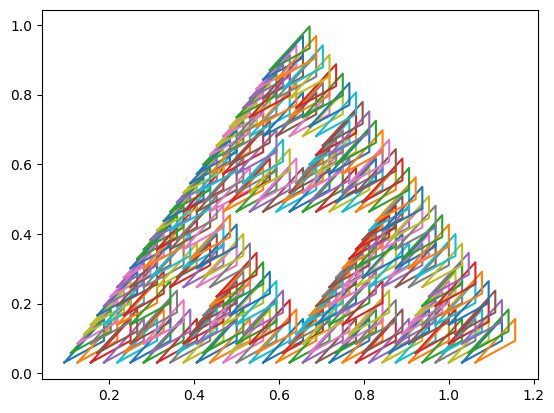

In [82]:
def rand_triangulo():
    return [
        [random.randint(0, 6), random.randint(0, 6)],
        [random.randint(0, 6), random.randint(0, 6)],
        [random.randint(0, 6), random.randint(0, 6)]
    ]

def rand_sierpinski(iteraciones):
    lista_poligonos = [rand_triangulo()]
    
    for _ in range(iteraciones):
        nuevos_poligonos = []
        for j in [1, 2, 3]:
            for pol in lista_poligonos:
                nuevos_poligonos.append(ftriangulo(j, pol))
        lista_poligonos = nuevos_poligonos

    plt.figure()
    for pol in lista_poligonos:
        x = [p[0] for p in pol] + [pol[0][0]]
        y = [p[1] for p in pol] + [pol[0][1]]
        plt.plot(x, y)

rand_sierpinski(5)


## 6. Curva de Koch

###  Escribe un programa que dibuje con animación la curva clásica de Koch en el paso n.

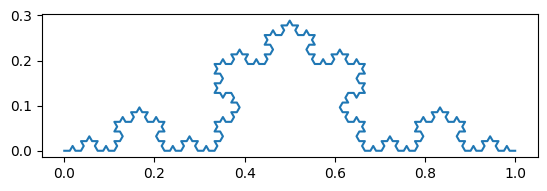

In [83]:
def curva_koch(p):
    h = 3 ** (-p)
    j = 4 ** p - 1
    x, y = 0.0, 0.0
    puntos = [(x, y)]
    
    for n in range(j + 1):
        m = n
        s = 0
        for l in range(p): 
            t = m % 4
            m = m // 4 
            s += ((t + 1) % 3) - 1
        x += math.cos((s * math.pi) / 3) * h
        y += math.sin((s * math.pi) / 3) * h
        puntos.append((x, y))
    xs = [pt[0] for pt in puntos]
    ys = [pt[1] for pt in puntos]
    
    plt.figure()
    plt.plot(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')

curva_koch(4)

## 7. Curva de Koch aleatoria

### Escribe un programa que dibuje una curva de Koch aleatoria en la que, en cada paso, se elige equiprobablemente la orientación del triángulo hacia arriba o hacia abajo.


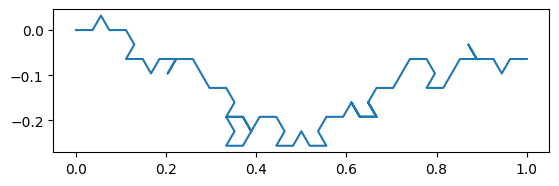

In [84]:
def rand_koch(p):
    h = 3 ** (-p)
    j = 4 ** p - 1
    x, y = 0.0, 0.0
    puntos = [(x, y)]
    for n in range(j + 1):
        m = n
        s = 0
        for _ in range(p):
            t = m % 4
            m = m // 4
            s += ((t + 1) % 3) - 1
        a = random.choice([0, 1])
        if a == 0:
            angulo = (s * math.pi) / 3
        else:
            angulo = (5 * s * math.pi) / 3
        x += math.cos(angulo) * h
        y += math.sin(angulo) * h
        puntos.append((x, y))
    xs = [pt[0] for pt in puntos]
    ys = [pt[1] for pt in puntos]
    plt.figure()
    plt.plot(xs, ys)
    plt.gca().set_aspect('equal', adjustable='box')

rand_koch(3)


## 8. Movimiento Browniano unidimensional

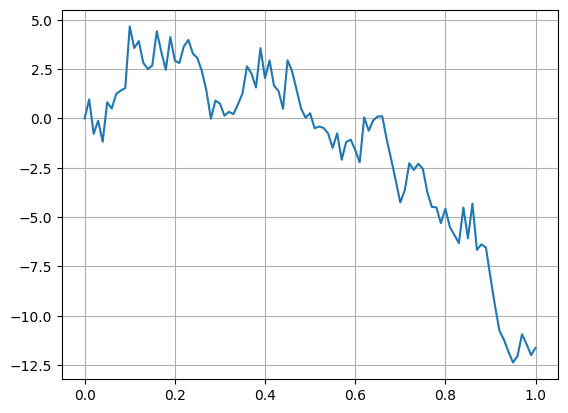

In [85]:
def browniano(n):
    pasos = np.random.normal(0, 1, n)
    trayectoria = np.concatenate(([0], np.cumsum(pasos)))
    tiempo = np.linspace(0, 1, n+1)
    promedio = np.mean(trayectoria)
    
    plt.figure()
    plt.plot(tiempo, trayectoria)
    plt.grid(True)

browniano(100)